**Recurrent Neural Networks**

**Problem Statement:** Predicting spice crop yield from different parameters. The end result is a model that predicts yield for spice crops such as black pepper,dry ginger and turmeric.

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
#from keras.optimizers import Adam
from keras.layers import Dense, BatchNormalization, Dropout, LSTM,GRU,SimpleRNN
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

In [ ]:
pip install adam

In [ ]:
!pip install keras

In [ ]:
from keras.optimizers import gradient_descent_v2

## BLACK PEPPER

In [ ]:
# importing data
data_bp = pd.read_csv('/content/black pepper 2008-2020.csv')
data_bp.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,2028,256,1451.29,24.29,33.01,29.5,0.184,8.29,6.6,0.13
1,Alappuzha,2009,1943,242,1443.29,24.29,35.93,31.0,0.106,8.52,6.2,0.12
2,Alappuzha,2010,2134,297,1610.32,24.29,39.81,33.0,0.330,7.88,6.0,0.14
3,Alappuzha,2011,1940,174,1529.31,23.31,37.87,31.5,0.112,7.89,5.9,0.09
4,Alappuzha,2012,1997,167,1613.32,25.26,36.90,32.0,0.106,8.19,6.0,0.08


In [ ]:
data_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                169 non-null    object 
 1   YEAR                    169 non-null    int64  
 2   AREA                    169 non-null    int64  
 3   PRODUCTION              169 non-null    int64  
 4   AVERAGE RAINFALL        169 non-null    float64
 5   MINIMUM TEMPERATURE     169 non-null    float64
 6   MAXIMUM TEMPERATURE     169 non-null    float64
 7   AVERAGE TEMPERATURE     169 non-null    float64
 8   RELATIVE SOIL MOISTURE  169 non-null    float64
 9   AVERAGE WINDSPEED       169 non-null    float64
 10  pH                      169 non-null    float64
 11  YIELD                   169 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 16.0+ KB


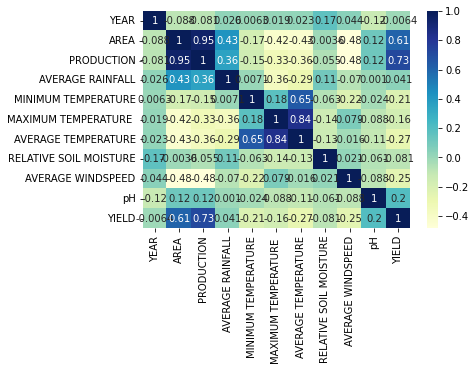

In [ ]:
num_df_bp=data_bp.select_dtypes(include=["float64","int64"])
sns.heatmap(num_df_bp.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
le=pre.LabelEncoder()
cat_df_bp=data_bp.select_dtypes(exclude=[float,int])
for x in cat_df_bp.columns:
    data_bp[x]=le.fit_transform(data_bp[x])
X=data_bp.drop(['YIELD'], axis=1)
Y=data_bp["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0,2008,2028,256,1451.29,24.29,33.01,29.5,0.184,8.29,6.6
1,0,2009,1943,242,1443.29,24.29,35.93,31.0,0.106,8.52,6.2
2,0,2010,2134,297,1610.32,24.29,39.81,33.0,0.330,7.88,6.0
3,0,2011,1940,174,1529.31,23.31,37.87,31.5,0.112,7.89,5.9
4,0,2012,1997,167,1613.32,25.26,36.90,32.0,0.106,8.19,6.0
...,...,...,...,...,...,...,...,...,...,...,...
164,12,2016,25542,4060,1939.39,19.43,29.13,25.0,0.436,7.67,6.2
165,12,2017,20825,4526,1880.38,19.43,32.04,26.5,0.429,9.51,6.4
166,12,2018,16571,4497,1844.37,15.54,32.04,24.5,0.422,9.79,5.5
167,12,2019,16189,2431,1972.39,15.54,32.04,24.5,0.217,9.01,5.4


In [ ]:
df_list = data_bp.columns

In [ ]:
sc = MinMaxScaler()
data_bp[df_list] = sc.fit_transform(data_bp[df_list])
data_bp

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.0,0.000000,0.015055,0.002503,0.384945,0.750429,0.399725,0.541667,0.228070,0.461735,1.000000,0.092593
1,0.0,0.083333,0.014073,0.002233,0.380645,0.750429,0.600275,0.666667,0.000000,0.491071,0.666667,0.074074
2,0.0,0.166667,0.016280,0.003292,0.470428,0.750429,0.866758,0.833333,0.654971,0.409439,0.500000,0.111111
3,0.0,0.250000,0.014038,0.000924,0.426883,0.666381,0.733516,0.708333,0.017544,0.410714,0.416667,0.018519
4,0.0,0.333333,0.014697,0.000789,0.472041,0.833619,0.666896,0.750000,0.000000,0.448980,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
164,1.0,0.666667,0.286739,0.075746,0.647312,0.333619,0.133242,0.166667,0.964912,0.382653,0.666667,0.148148
165,1.0,0.750000,0.232238,0.084718,0.615593,0.333619,0.333104,0.291667,0.944444,0.617347,0.833333,0.259259
166,1.0,0.833333,0.183087,0.084160,0.596236,0.000000,0.333104,0.125000,0.923977,0.653061,0.083333,0.351852
167,1.0,0.916667,0.178673,0.044381,0.665051,0.000000,0.333104,0.125000,0.324561,0.553571,0.000000,0.129630


In [ ]:
X=data_bp.drop(['YIELD'], axis=1)
Y=data_bp["YIELD"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(118, 1, 11) (118,) (51, 1, 11) (51,)


# Defining a model

In [ ]:
model = Sequential()
#FIRST LAYER
model.add(SimpleRNN(units = 500, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#SECOND LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#THIRD LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#FOURTH LAYER
model.add(SimpleRNN(units = 500, return_sequences=False))
model.add(Dropout(0.2))
#OUTPUT LAYER
model.add(Dense(units = 1,activation = 'sigmoid'))
#COMPILING MODEL
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Fitting the RNN to the Training set
history=model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 160ms/step - loss: 0.0864 - val_loss: 0.0459
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0416 - val_loss: 0.0309
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0305
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 0.0363 - val_loss: 0.0169
Epoch 5/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0302 - val_loss: 0.0162
Epoch 6/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0245 - val_loss: 0.0161
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 0.0219 - val_loss: 0.0151
Epoch 8/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0210 - val_loss: 0.0250
Epoch 9/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0240 - val_loss: 0.0140
Epoch 10/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0212 - val_loss: 0.0149
Epoch 11/200
4/4 [

## MODEL EVALUATION

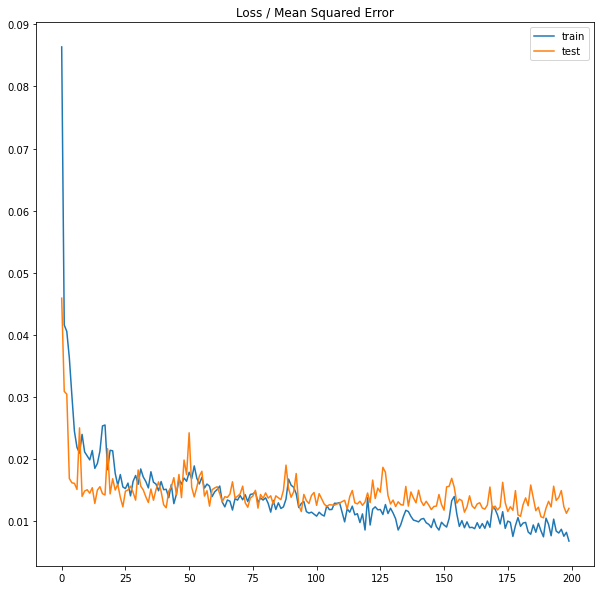

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [ ]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

NameError: ignored

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

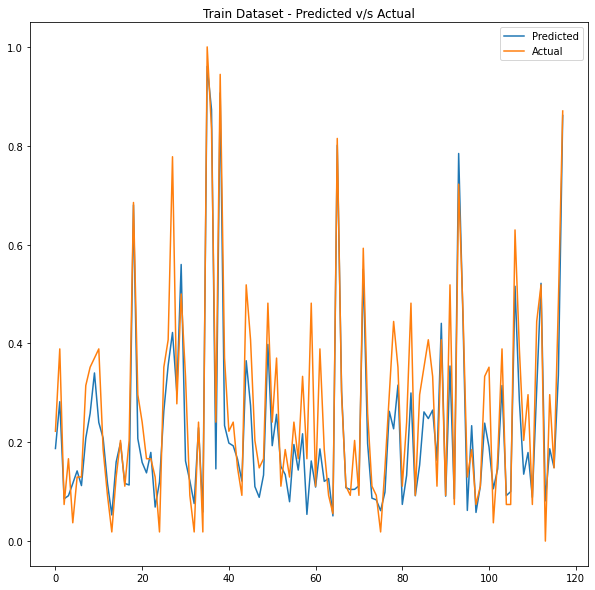

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.legend()
plt.show()

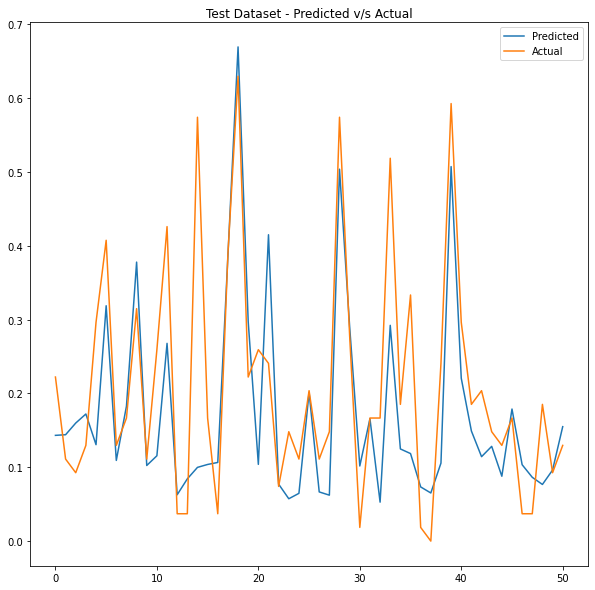

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Test: %.3f'% (rmse_test))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))


MAE Test: 0.077
RMSE Test: 0.110
MAPE Train: 1.314
MAPE Test: 1.220


## DRY GINGER

In [ ]:
# importing data
data_dg = pd.read_csv('/dry ginger 2008-2020.csv')
data_dg.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,161,353,1490.74,24.95,33.98,31.14,0.39,8.29,6.27,2.19
1,Alappuzha,2009,66,163,1482.52,24.95,36.98,32.73,0.38,8.52,6.07,2.47
2,Alappuzha,2010,87,264,1654.09,24.95,40.97,34.84,0.47,7.88,5.62,3.02
3,Alappuzha,2011,94,172,1570.87,23.95,38.98,33.25,0.42,7.89,5.56,1.83
4,Alappuzha,2012,125,220,1657.17,25.94,37.98,33.78,0.42,8.19,6.04,1.76


In [ ]:
data_dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                181 non-null    object 
 1   YEAR                    181 non-null    int64  
 2   AREA                    181 non-null    int64  
 3   PRODUCTION              181 non-null    int64  
 4   AVERAGE RAINFALL        181 non-null    float64
 5   MINIMUM TEMPERATURE     181 non-null    float64
 6   MAXIMUM TEMPERATURE     181 non-null    float64
 7   AVERAGE TEMPERATURE     181 non-null    float64
 8   RELATIVE SOIL MOISTURE  181 non-null    float64
 9   AVERAGE WINDSPEED       181 non-null    float64
 10  pH                      181 non-null    float64
 11  YIELD                   181 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 17.1+ KB


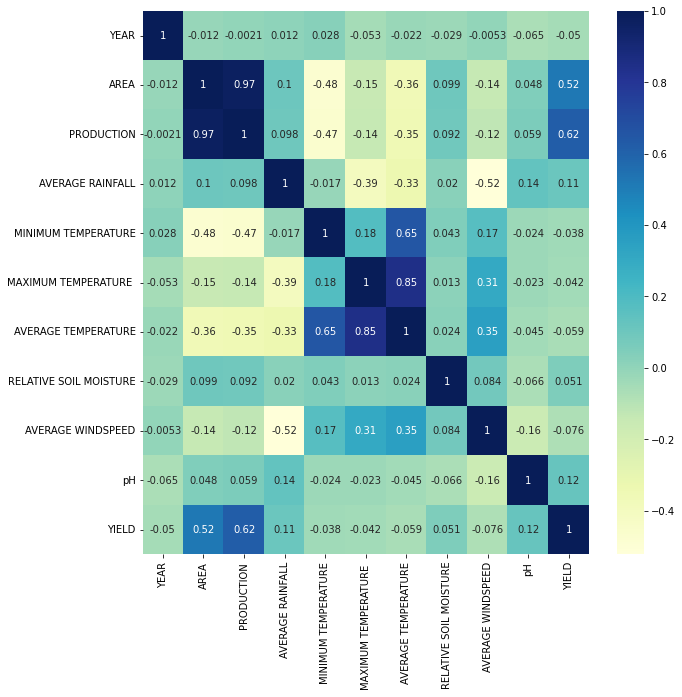

In [ ]:
num_df_dg=data_dg.select_dtypes(include=["float64","int64"])
sns.heatmap(num_df_dg.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
le=pre.LabelEncoder()
cat_df_dg=data_dg.select_dtypes(exclude=[float,int])
for x in cat_df_dg.columns:
    data_dg[x]=le.fit_transform(data_dg[x])
X=data_dg.drop(['YIELD'], axis=1)
Y=data_dg["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0,2008,161,353,1490.74,24.95,33.98,31.14,0.39,8.29,6.27
1,0,2009,66,163,1482.52,24.95,36.98,32.73,0.38,8.52,6.07
2,0,2010,87,264,1654.09,24.95,40.97,34.84,0.47,7.88,5.62
3,0,2011,94,172,1570.87,23.95,38.98,33.25,0.42,7.89,5.56
4,0,2012,125,220,1657.17,25.94,37.98,33.78,0.42,8.19,6.04
...,...,...,...,...,...,...,...,...,...,...,...
176,4,2017,22,77,795.20,23.95,36.98,32.20,0.41,9.44,5.55
177,4,2018,46,182,853.76,24.95,39.97,34.31,0.28,10.15,6.51
178,4,2019,139,444,875.33,21.95,36.98,31.14,0.38,9.86,6.47
179,4,2020,104,340,882.52,22.95,36.98,31.67,0.41,9.82,6.15


In [ ]:
df_list = data_dg.columns

In [ ]:
sc = MinMaxScaler()
data_dg[df_list] = sc.fit_transform(data_dg[df_list])
data_dg

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.000000,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72,0.109817
1,0.000000,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52,0.156406
2,0.000000,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07,0.247920
3,0.000000,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01,0.049917
4,0.000000,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49,0.038270
...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.750000,0.000689,0.000439,0.020969,0.666667,0.600400,0.625099,0.714286,0.608418,0.00,0.327787
177,0.307692,0.833333,0.003999,0.003147,0.051613,0.750209,0.799867,0.791634,0.095238,0.698980,0.96,0.404326
178,0.307692,0.916667,0.016823,0.009906,0.062901,0.499582,0.600400,0.541436,0.571429,0.661990,0.92,0.276206
179,0.307692,1.000000,0.011997,0.007223,0.066664,0.583124,0.600400,0.583268,0.714286,0.656888,0.60,0.289517


In [ ]:
X=data_dg.drop(['YIELD'], axis=1)
Y=data_dg["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0.000000,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72
1,0.000000,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52
2,0.000000,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07
3,0.000000,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01
4,0.000000,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49
...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.750000,0.000689,0.000439,0.020969,0.666667,0.600400,0.625099,0.714286,0.608418,0.00
177,0.307692,0.833333,0.003999,0.003147,0.051613,0.750209,0.799867,0.791634,0.095238,0.698980,0.96
178,0.307692,0.916667,0.016823,0.009906,0.062901,0.499582,0.600400,0.541436,0.571429,0.661990,0.92
179,0.307692,1.000000,0.011997,0.007223,0.066664,0.583124,0.600400,0.583268,0.714286,0.656888,0.60


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


# Defining a model

In [ ]:
model = Sequential()
#FIRST LAYER
model.add(SimpleRNN(units = 500, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#SECOND LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#THIRD LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#FOURTH LAYER
model.add(SimpleRNN(units = 500, return_sequences=False))
model.add(Dropout(0.2))
#OUTPUT LAYER
model.add(Dense(units = 1,activation = 'sigmoid'))
#COMPILING MODEL
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Fitting the RNN to the Training set
history=model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 192ms/step - loss: 0.0720 - val_loss: 0.0868
Epoch 2/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0366 - val_loss: 0.0598
Epoch 3/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0209 - val_loss: 0.0415
Epoch 4/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0186 - val_loss: 0.0383
Epoch 5/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0170 - val_loss: 0.0401
Epoch 6/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0150 - val_loss: 0.0390
Epoch 7/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0149 - val_loss: 0.0381
Epoch 8/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0169 - val_loss: 0.0402
Epoch 9/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0158 - val_loss: 0.0337
Epoch 10/200
4/4 [==============================] - 0s 38ms/step - loss: 0.0177 - val_loss: 0.0474
Epoch 11/200
4/4 [

## MODEL EVALUATION

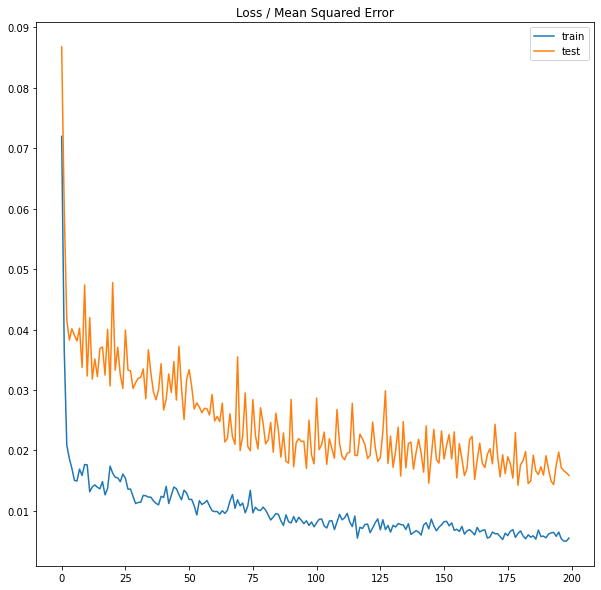

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

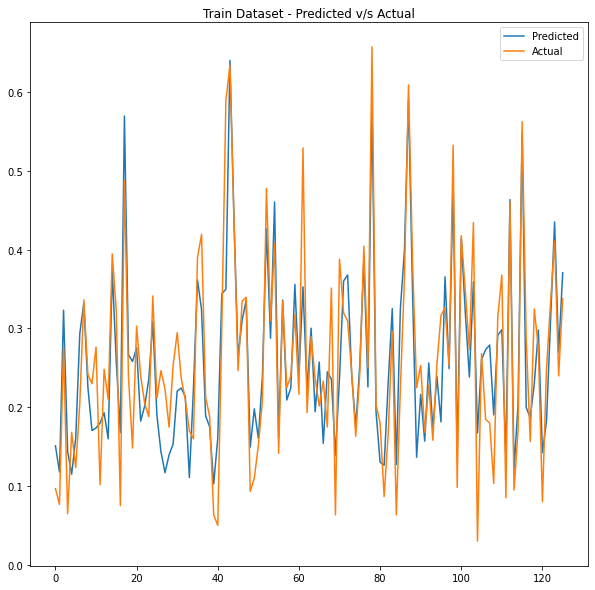

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.legend()
plt.show()

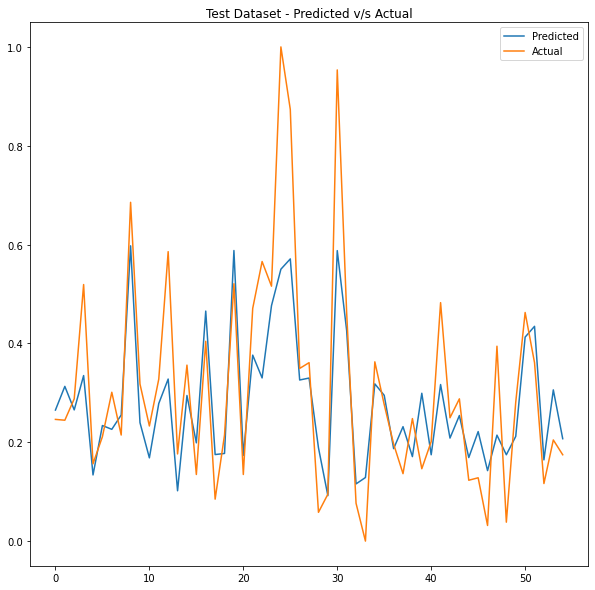

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Test: %.3f'% (rmse_test))


MAE Test: 0.090
RMSE Test: 0.126


# TURMERIC

In [ ]:
# importing data
data_tc = pd.read_csv('/turmeric 2008-2020.csv')
data_tc.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,11,13,1473.06,24.65,33.51,30.53,0.22,8.29,6.28,1.18
1,Alappuzha,2009,20,21,1464.94,24.65,36.47,32.09,0.30,8.52,4.89,1.05
2,Alappuzha,2010,15,20,1634.48,24.65,40.41,34.16,0.36,7.88,5.38,1.33
3,Alappuzha,2011,12,21,1552.25,23.66,38.44,32.60,0.33,7.89,5.46,1.75
4,Alappuzha,2012,11,12,1637.52,25.64,37.45,33.12,0.32,8.19,5.64,1.09


In [ ]:
data_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                181 non-null    object 
 1   YEAR                    181 non-null    int64  
 2   AREA                    181 non-null    int64  
 3   PRODUCTION              181 non-null    int64  
 4   AVERAGE RAINFALL        181 non-null    float64
 5   MINIMUM TEMPERATURE     181 non-null    float64
 6   MAXIMUM TEMPERATURE     181 non-null    float64
 7   AVERAGE TEMPERATURE     181 non-null    float64
 8   RELATIVE SOIL MOISTURE  181 non-null    float64
 9   AVERAGE WINDSPEED       181 non-null    float64
 10  pH                      181 non-null    float64
 11  YIELD                   181 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 17.1+ KB


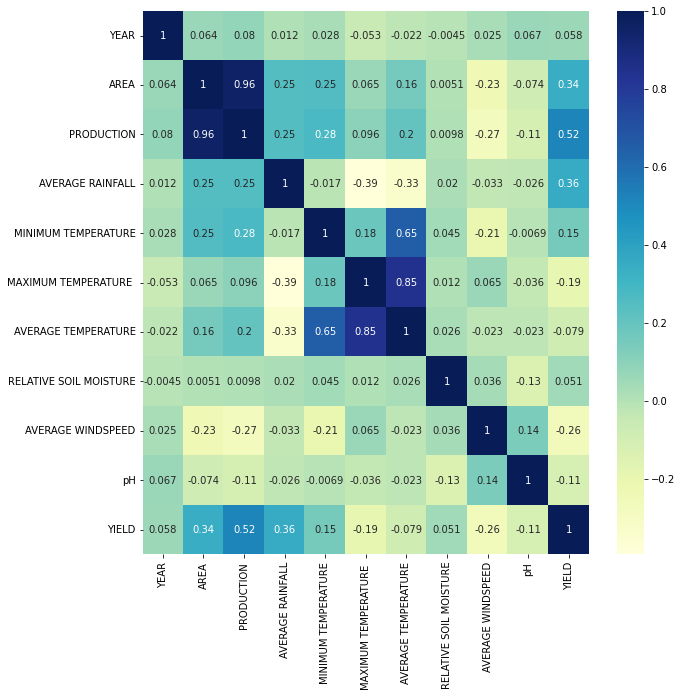

In [ ]:
num_df_tc=data_tc.select_dtypes(include=["float64","int64"])
sns.heatmap(num_df_tc.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
le=pre.LabelEncoder()
cat_df_tc=data_tc.select_dtypes(exclude=[float,int])
for x in cat_df_tc.columns:
    data_tc[x]=le.fit_transform(data_tc[x])
X=data_tc.drop(['YIELD'], axis=1)
Y=data_tc["YIELD"]

In [ ]:
df_list = data_tc.columns

In [ ]:
sc = MinMaxScaler()
data_tc[df_list] = sc.fit_transform(data_tc[df_list])
data_tc

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.000000,0.000000,0.003148,0.002083,0.384948,0.749789,0.399865,0.541063,0.1250,0.461735,0.515254,0.106007
1,0.000000,0.083333,0.012592,0.004859,0.380648,0.749789,0.600135,0.666667,0.6250,0.491071,0.044068,0.060071
2,0.000000,0.166667,0.007345,0.004512,0.470433,0.749789,0.866712,0.833333,1.0000,0.409439,0.210169,0.159011
3,0.000000,0.250000,0.004197,0.004859,0.426886,0.666103,0.733424,0.707729,0.8125,0.410714,0.237288,0.307420
4,0.000000,0.333333,0.003148,0.001736,0.472043,0.833474,0.666441,0.749597,0.7500,0.448980,0.298305,0.074205
...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.583333,0.069255,0.048941,0.000000,0.749789,0.533153,0.624799,0.6250,0.589286,0.366102,0.395760
177,0.307692,0.750000,0.082896,0.062131,0.020971,0.666103,0.600135,0.624799,0.7500,0.608418,0.481356,0.445230
178,0.307692,0.833333,0.012592,0.014578,0.051613,0.749789,0.799729,0.791465,0.1250,0.480867,0.325424,0.547703
179,0.307692,0.916667,0.032529,0.020826,0.062904,0.499577,0.600135,0.541063,0.5625,0.336735,0.105085,0.296820


In [ ]:
X=data_tc.drop(['YIELD'], axis=1)
Y=data_tc["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0.000000,0.000000,0.003148,0.002083,0.384948,0.749789,0.399865,0.541063,0.1250,0.461735,0.515254
1,0.000000,0.083333,0.012592,0.004859,0.380648,0.749789,0.600135,0.666667,0.6250,0.491071,0.044068
2,0.000000,0.166667,0.007345,0.004512,0.470433,0.749789,0.866712,0.833333,1.0000,0.409439,0.210169
3,0.000000,0.250000,0.004197,0.004859,0.426886,0.666103,0.733424,0.707729,0.8125,0.410714,0.237288
4,0.000000,0.333333,0.003148,0.001736,0.472043,0.833474,0.666441,0.749597,0.7500,0.448980,0.298305
...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.583333,0.069255,0.048941,0.000000,0.749789,0.533153,0.624799,0.6250,0.589286,0.366102
177,0.307692,0.750000,0.082896,0.062131,0.020971,0.666103,0.600135,0.624799,0.7500,0.608418,0.481356
178,0.307692,0.833333,0.012592,0.014578,0.051613,0.749789,0.799729,0.791465,0.1250,0.480867,0.325424
179,0.307692,0.916667,0.032529,0.020826,0.062904,0.499577,0.600135,0.541063,0.5625,0.336735,0.105085


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


# Defining a model

In [ ]:
model = Sequential()
#FIRST LAYER
model.add(SimpleRNN(units = 500, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#SECOND LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#THIRD LAYER
model.add(SimpleRNN(units = 500, return_sequences = True))
model.add(Dropout(0.2))
#FOURTH LAYER
model.add(SimpleRNN(units = 500, return_sequences=False))
model.add(Dropout(0.2))
#OUTPUT LAYER
model.add(Dense(units = 1,activation = 'sigmoid'))
#COMPILING MODEL
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Fitting the RNN to the Training set
history=model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
4/4 [==============================] - 4s 202ms/step - loss: 0.0929 - val_loss: 0.0790
Epoch 2/200
4/4 [==============================] - 0s 38ms/step - loss: 0.0507 - val_loss: 0.0606
Epoch 3/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0393 - val_loss: 0.0486
Epoch 4/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0349 - val_loss: 0.0523
Epoch 5/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0398 - val_loss: 0.0355
Epoch 6/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0420 - val_loss: 0.0341
Epoch 7/200
4/4 [==============================] - 0s 42ms/step - loss: 0.0327 - val_loss: 0.0467
Epoch 8/200
4/4 [==============================] - 0s 41ms/step - loss: 0.0324 - val_loss: 0.0366
Epoch 9/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0316 - val_loss: 0.0362
Epoch 10/200
4/4 [==============================] - 0s 38ms/step - loss: 0.0281 - val_loss: 0.0390
Epoch 11/200
4/4 [

## MODEL EVALUATION

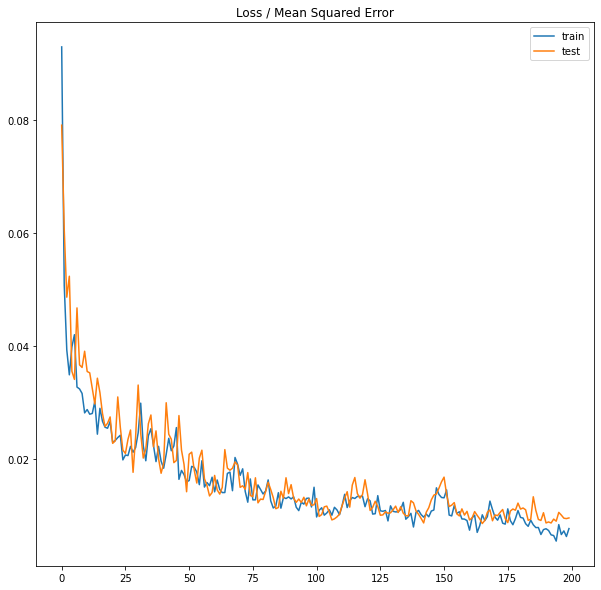

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

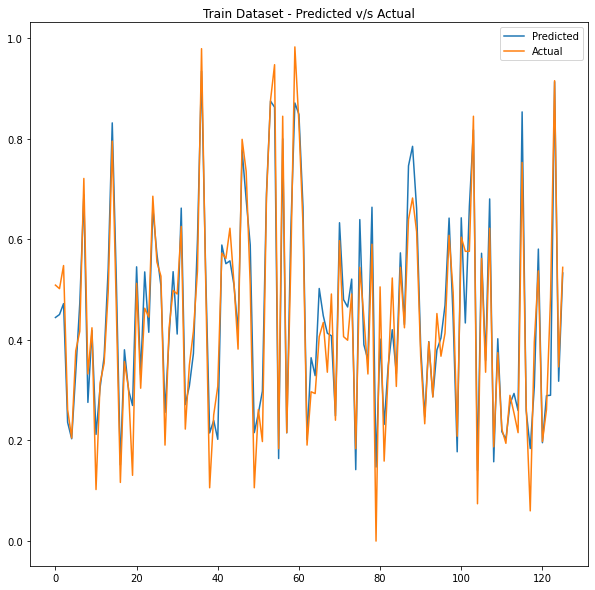

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.legend()
plt.show()

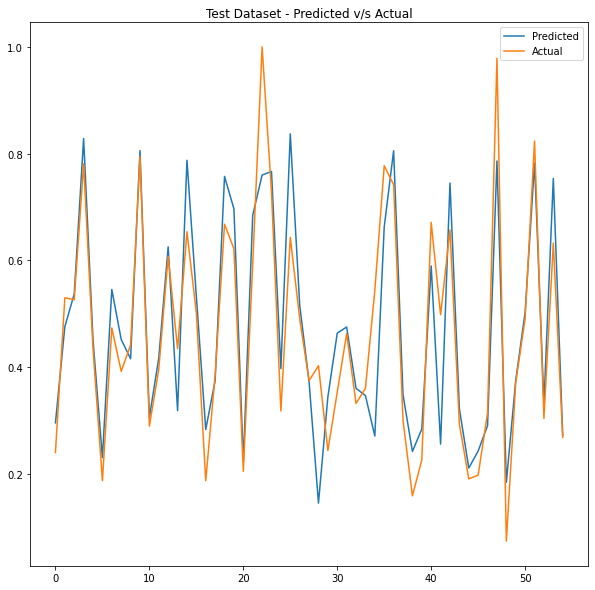

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Test: %.3f'% (rmse_test))
# Mean Absolute Percentage Error
mape_test=mean_absolute_percentage_error(y_test,testPredict)
print('MAPE Test: %.3f'% (mape_test))

MAE Test: 0.071
RMSE Test: 0.098
MAPE Test: 0.693


# BPNN


# Black Pepper

In [ ]:
import time
import numpy
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM,SimpleRNN,GRU,Bidirectional
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]


    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
dataset = read_csv('/black pepper 2008-2020.csv', header=0, usecols=[1])
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
values = reframed.values
threshold = int(0.82* len(reframed))
train = values[:threshold, :]
test = values[threshold:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
regressorBKP = Sequential()
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform',  input_dim = 1))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
regressorBKP.compile(optimizer = 'adam', loss = 'mean_squared_error')
start = time.time()
print("Compilation Time : ", time.time() - start)

history = regressorBKP.fit(train_X, train_y, epochs = 200, batch_size = 32 ,validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)


Compilation Time :  3.8623809814453125e-05
Epoch 1/200
5/5 [==============================] - 1s 42ms/step - loss: 0.0924 - val_loss: 0.0783
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0790 - val_loss: 0.0698
Epoch 3/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0663 - val_loss: 0.0577
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0629 - val_loss: 0.0558
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0620 - val_loss: 0.0596
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0614 - val_loss: 0.0610
Epoch 7/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0620 - val_loss: 0.0573
Epoch 8/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0624 - val_loss: 0.0577
Epoch 9/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0604 - val_loss: 0.0577
Epoch 10/200
5/5 [==============================] - 0s 16ms/step - loss: 0.

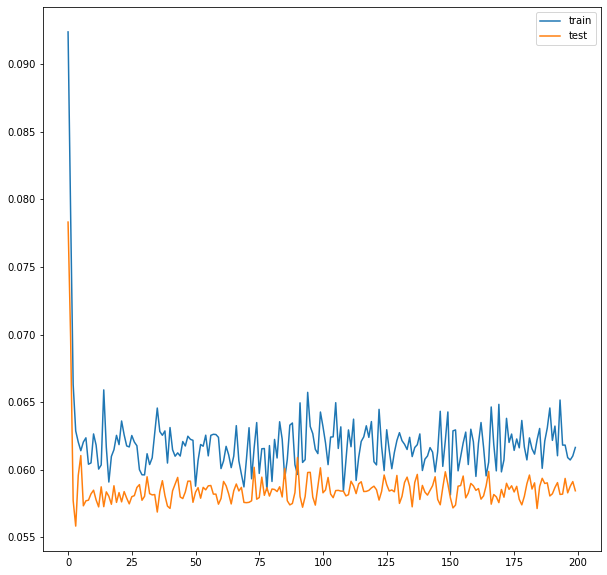

In [ ]:
pyplot.figure(2)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
train_xhat=regressorBKP.predict(train_X)
yhat = regressorBKP.predict(test_X)

In [ ]:
trainPredict = scaler.inverse_transform(train_xhat)
train_yhat = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(yhat)
test_yhat = scaler.inverse_transform([test_y])

In [ ]:
look_back=1

trainPredictPlot = numpy.empty_like(scaled)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

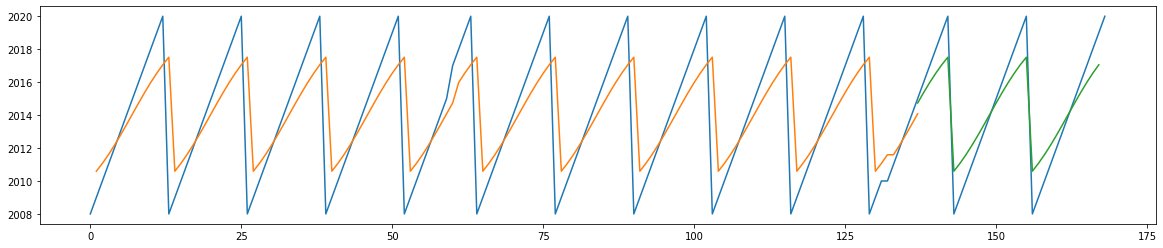

In [ ]:
testPredictPlot = numpy.empty_like(scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):len(scaled)-1, :] = testPredict
pyplot.figure(figsize = (20, 4))
pyplot.plot(scaler.inverse_transform(scaled))
pyplot.plot(trainPredictPlot)
pyplot.plot(testPredictPlot)
pyplot.show()

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Score: %.4f RMSE' % rmse)
test2 = np.abs(mean_squared_error(inv_y, inv_yhat)).mean()
print('Test Score: %.4f MAE' % (test2))
test = np.mean(np.abs(mean_squared_error(inv_y, inv_yhat) / inv_y))
print('Test Score: %.4f MAPE' % (test))

Test Score: 2.9008 RMSE
Test Score: 8.4147 MAE
Test Score: 0.0042 MAPE


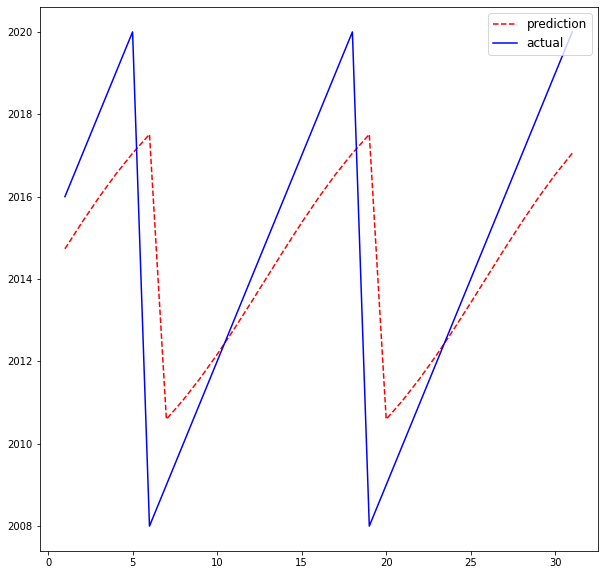

In [ ]:
pyplot.plot([x for x in range(1, inv_yhat.shape[0]+1)], inv_yhat, linestyle='--', color='red', label='prediction')
pyplot.plot([x for x in range(1, inv_y.shape[0]+1)], inv_y, linestyle='-', color='blue', label='actual')
pyplot.legend(loc=1, prop={'size': 12})
pyplot.show()

# Dry Ginger

In [ ]:
import time
import numpy
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM,SimpleRNN,GRU,Bidirectional
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]


    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
dataset = read_csv('/dry ginger 2008-2020.csv', header=0, usecols=[1])
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
values = reframed.values
threshold = int(0.90* len(reframed))
train = values[:threshold, :]
test = values[threshold:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
regressorBKP = Sequential()
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform',  input_dim = 1))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
regressorBKP.compile(optimizer = 'adam', loss = 'mean_squared_error')
start = time.time()
print("Compilation Time : ", time.time() - start)

history = regressorBKP.fit(train_X, train_y, epochs = 200, batch_size = 32 ,validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)


Compilation Time :  4.267692565917969e-05
Epoch 1/200
6/6 [==============================] - 1s 38ms/step - loss: 0.0899 - val_loss: 0.0980
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0725 - val_loss: 0.0903
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0628 - val_loss: 0.0975
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0615 - val_loss: 0.0903
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0632 - val_loss: 0.0911
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0615 - val_loss: 0.0913
Epoch 7/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0606 - val_loss: 0.0906
Epoch 8/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0602 - val_loss: 0.0899
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0610 - val_loss: 0.0906
Epoch 10/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0

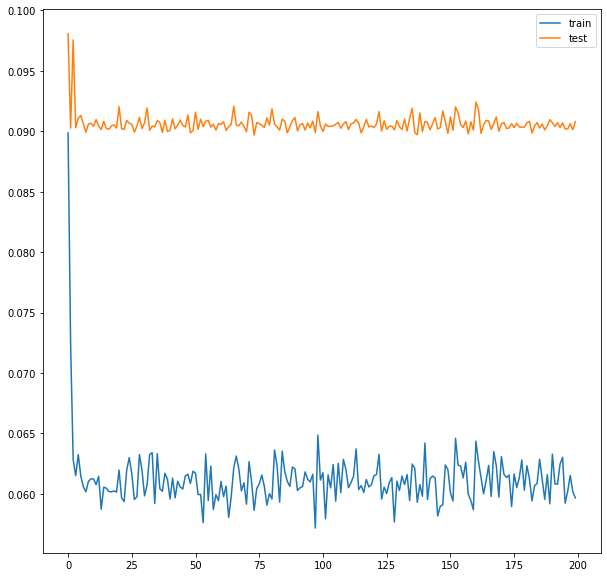

In [ ]:
pyplot.figure(2)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
train_xhat=regressorBKP.predict(train_X)
yhat = regressorBKP.predict(test_X)

In [ ]:
trainPredict = scaler.inverse_transform(train_xhat)
train_yhat = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(yhat)
test_yhat = scaler.inverse_transform([test_y])

In [ ]:
look_back=1

trainPredictPlot = numpy.empty_like(scaled)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

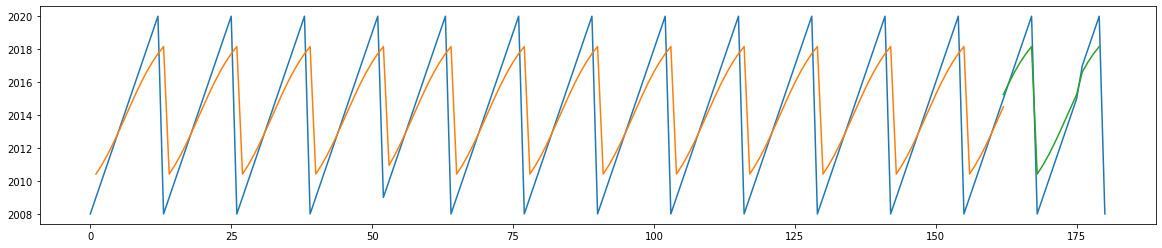

In [ ]:
testPredictPlot = numpy.empty_like(scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):len(scaled)-1, :] = testPredict
pyplot.figure(figsize = (20, 4))
pyplot.plot(scaler.inverse_transform(scaled))
pyplot.plot(trainPredictPlot)
pyplot.plot(testPredictPlot)
pyplot.show()

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Score: %.4f RMSE' % rmse)
test2 = np.abs(mean_squared_error(inv_y, inv_yhat)).mean()
print('Test Score: %.4f MAE' % (test2))
test = np.mean(np.abs(mean_squared_error(inv_y, inv_yhat) / inv_y))
print('Test Score: %.4f MAPE' % (test))


Test Score: 3.6158 RMSE
Test Score: 13.0744 MAE
Test Score: 0.0065 MAPE


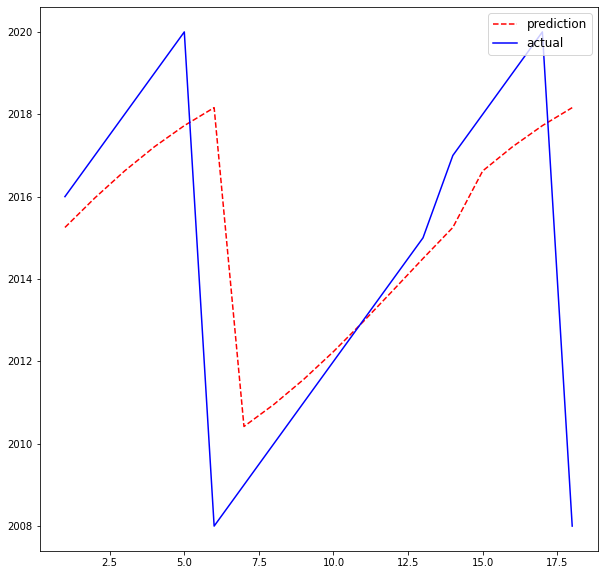

In [ ]:
pyplot.plot([x for x in range(1, inv_yhat.shape[0]+1)], inv_yhat, linestyle='--', color='red', label='prediction')
pyplot.plot([x for x in range(1, inv_y.shape[0]+1)], inv_y, linestyle='-', color='blue', label='actual')
pyplot.legend(loc=1, prop={'size': 12})
pyplot.show()

# Turmeric

In [ ]:
import time
import numpy
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM,SimpleRNN,GRU,Bidirectional
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]


    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
dataset = read_csv('/turmeric 2008-2020.csv', header=0, usecols=[1])
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
values = reframed.values
threshold = int(0.87 * len(reframed))
train = values[:threshold, :]
test = values[threshold:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
regressorBKP = Sequential()
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform',  input_dim = 1))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 500, kernel_initializer = 'uniform'))
regressorBKP.add(Dropout(0.2))
regressorBKP.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
regressorBKP.compile(optimizer = 'adam', loss = 'mean_squared_error')
start = time.time()
print("Compilation Time : ", time.time() - start)

history = regressorBKP.fit(train_X, train_y, epochs = 200, batch_size = 32 ,validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)


Compilation Time :  6.937980651855469e-05
Epoch 1/200
5/5 [==============================] - 1s 46ms/step - loss: 0.0920 - val_loss: 0.0692
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0767 - val_loss: 0.0513
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.0674 - val_loss: 0.0380
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0667 - val_loss: 0.0401
Epoch 5/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0647 - val_loss: 0.0444
Epoch 6/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0651 - val_loss: 0.0406
Epoch 7/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0640 - val_loss: 0.0405
Epoch 8/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0630 - val_loss: 0.0403
Epoch 9/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0632 - val_loss: 0.0431
Epoch 10/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0

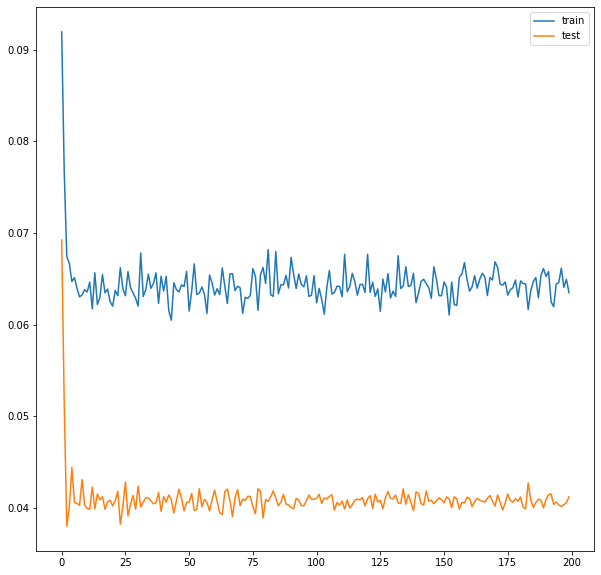

In [ ]:
pyplot.figure(2)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
train_xhat=regressorBKP.predict(train_X)
yhat = regressorBKP.predict(test_X)

In [ ]:
trainPredict = scaler.inverse_transform(train_xhat)
train_yhat = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(yhat)
test_yhat = scaler.inverse_transform([test_y])

In [ ]:
look_back=1

trainPredictPlot = numpy.empty_like(scaled)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

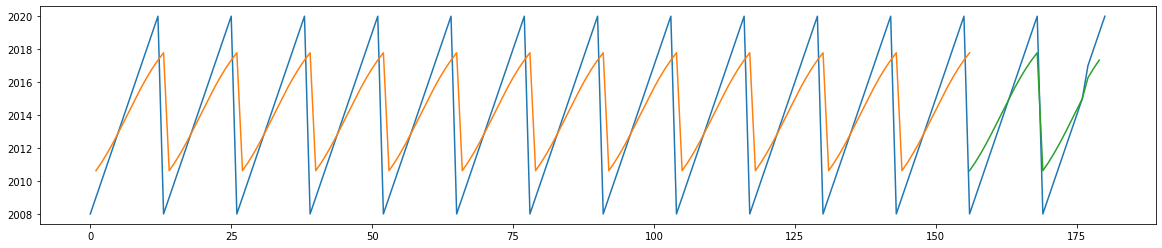

In [ ]:
testPredictPlot = numpy.empty_like(scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):len(scaled)-1, :] = testPredict
pyplot.figure(figsize = (20, 4))
pyplot.plot(scaler.inverse_transform(scaled))
pyplot.plot(trainPredictPlot)
pyplot.plot(testPredictPlot)
pyplot.show()

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test Score: %.4f RMSE' % rmse)
test2 = np.abs(mean_squared_error(inv_y, inv_yhat)).mean()
print('Test Score: %.4f MAE' % (test2))
test = np.mean(np.abs(mean_squared_error(inv_y, inv_yhat) / inv_y))
print('Test Score: %.4f MAPE' % (test))

Test Score: 2.4350 RMSE
Test Score: 5.9294 MAE
Test Score: 0.0029 MAPE


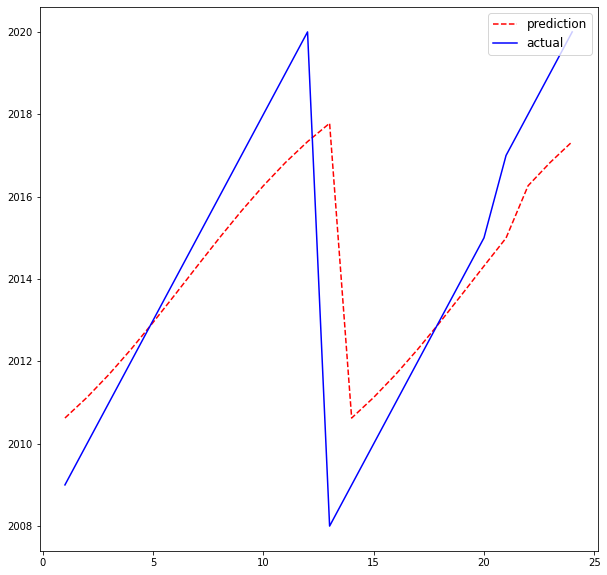

In [ ]:
pyplot.plot([x for x in range(1, inv_yhat.shape[0]+1)], inv_yhat, linestyle='--', color='red', label='prediction')
pyplot.plot([x for x in range(1, inv_y.shape[0]+1)], inv_y, linestyle='-', color='blue', label='actual')
pyplot.legend(loc=1, prop={'size': 12})
pyplot.show()